Problem Statement

Online judges provide a platform where many users solve problems everyday to improve their programming skills. The users can be beginners or experts in competitive programming. Some users might be good at solving specific category of problems(e.g. Greedy, Graph algorithms, Dynamic Programming etc.) while others may be beginners in the same. There can be patterns to everything, and the goal of the machine learning would be to identify these patterns and model user’s behaviour from these patterns. The goal of this challenge is to predict range of attempts a user will make to solve a given problem given user and problem details. Finding these patterns can help the programming committee, as it will help them to suggest relevant problems to solve and provide hints automatically on which users can get stuck.  


In [152]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

In [153]:
# pass in column names for each CSV and read them using pandas. 
# Column names available in the readme file
#Reading train file:
train = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/AV-Recommendation-Engine/master/train_submissions.csv')
#Reading user file:
user = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/AV-Recommendation-Engine/master/user_data.csv')
#Reading problem file:
problem = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/AV-Recommendation-Engine/master/problem_data.csv')
#Reading test file:
test = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/AV-Recommendation-Engine/master/test_submissions_NeDLEvX%20-%20test_submissions_NeDLEvX.csv')
#Reading sample submission file:
sample_sub = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/AV-Recommendation-Engine/master/sample_submission_SCGtj9F%20-%20sample_submission_SCGtj9F.csv')

In [154]:
train

,user_id,problem_id,attempts_range
0,user_232,prob_6507,1
1,user_3568,prob_2994,3
2,user_1600,prob_5071,1
3,user_2256,prob_703,1
4,user_2321,prob_356,1
...,...,...,...
155290,user_2959,prob_2052,1
155291,user_2530,prob_6167,6
155292,user_445,prob_3110,1
155293,user_2337,prob_2685,2


In [155]:
user

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds
0,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436
1,user_3028,63,52,0,India,17,1498998165,405.677,339.450,intermediate,1441893325
2,user_2268,226,203,-8,Egypt,24,1505566052,307.339,284.404,beginner,1454267603
3,user_480,611,490,1,Ukraine,94,1505257499,525.803,471.330,advanced,1350720417
4,user_650,504,479,12,Russia,4,1496613433,548.739,486.525,advanced,1395560498
...,...,...,...,...,...,...,...,...,...,...,...
3566,user_2685,161,120,0,Bangladesh,42,1505409069,306.193,246.560,beginner,1455055521
3567,user_1548,41,30,0,NaN,0,1504026868,331.135,218.463,beginner,1465142933
3568,user_1929,58,51,0,NaN,0,1505552744,330.275,262.901,beginner,1480086231
3569,user_2772,148,137,0,NaN,2,1496606504,409.977,345.757,intermediate,1480262887


In [156]:
problem

,problem_id,level_type,points,tags
0,prob_3649,H,NaN,NaN
1,prob_6191,A,NaN,NaN
2,prob_2020,F,NaN,NaN
3,prob_313,A,500.0,"greedy,implementation"
4,prob_101,A,500.0,"constructive algorithms,greedy,math"
...,...,...,...,...
6539,prob_3989,K,NaN,NaN
6540,prob_2710,A,500.0,"dfs and similar,dsu"
6541,prob_3269,C,1500.0,"brute force,number theory"
6542,prob_5071,A,500.0,implementation


In [157]:
test

,ID,user_id,problem_id
0,user_856_prob_5822,user_856,prob_5822
1,user_2642_prob_2334,user_2642,prob_2334
2,user_2557_prob_2920,user_2557,prob_2920
3,user_1572_prob_4598,user_1572,prob_4598
4,user_295_prob_6139,user_295,prob_6139
...,...,...,...
66550,user_1551_prob_2949,user_1551,prob_2949
66551,user_2617_prob_6266,user_2617,prob_6266
66552,user_799_prob_1800,user_799,prob_1800
66553,user_1265_prob_137,user_1265,prob_137


In [158]:
sample_sub

,ID,attempts_range
0,user_856_prob_5822,0
1,user_2642_prob_2334,0
2,user_2557_prob_2920,0
3,user_1572_prob_4598,0
4,user_295_prob_6139,0
...,...,...
66550,user_1551_prob_2949,0
66551,user_2617_prob_6266,0
66552,user_799_prob_1800,0
66553,user_1265_prob_137,0


Merge datasets

In [159]:
#merge datasets
data_train = train.merge(user, on='user_id', how='left').merge(problem, on='problem_id', how='left')
data_train

,user_id,problem_id,attempts_range,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,level_type,points,tags
0,user_232,prob_6507,1,53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935,B,1000.0,strings
1,user_3568,prob_2994,3,133,118,0,NaN,0,1502200122,324.255,235.378,beginner,1454664414,C,1500.0,"brute force,dp"
2,user_1600,prob_5071,1,50,44,0,NaN,7,1504719542,343.177,229.358,beginner,1473490873,A,500.0,implementation
3,user_2256,prob_703,1,271,233,23,Indonesia,40,1505175115,436.927,399.083,intermediate,1447736644,A,500.0,"brute force,implementation"
4,user_2321,prob_356,1,155,135,0,India,80,1505421849,492.546,472.190,advanced,1437724657,D,2000.0,"dfs and similar,trees"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155290,user_2959,prob_2052,1,226,200,0,India,17,1505584042,360.378,329.415,intermediate,1469909800,A,500.0,math
155291,user_2530,prob_6167,6,583,519,-17,Bangladesh,70,1505517523,327.122,286.411,beginner,1446655021,E,2500.0,data structures
155292,user_445,prob_3110,1,138,117,0,India,13,1504944103,318.807,252.007,beginner,1470375263,C,1500.0,dfs and similar
155293,user_2337,prob_2685,2,185,148,0,NaN,1,1486101965,317.661,259.748,beginner,1449598352,B,1000.0,"constructive algorithms,dp,greedy,implementation"


In [160]:
data_train['ID']=data_train['user_id'] + '_' + data_train['problem_id']
data_train

,user_id,problem_id,attempts_range,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,level_type,points,tags,ID
0,user_232,prob_6507,1,53,47,0,Bangladesh,1,1503633778,307.913,206.709,beginner,1432110935,B,1000.0,strings,user_232_prob_6507
1,user_3568,prob_2994,3,133,118,0,NaN,0,1502200122,324.255,235.378,beginner,1454664414,C,1500.0,"brute force,dp",user_3568_prob_2994
2,user_1600,prob_5071,1,50,44,0,NaN,7,1504719542,343.177,229.358,beginner,1473490873,A,500.0,implementation,user_1600_prob_5071
3,user_2256,prob_703,1,271,233,23,Indonesia,40,1505175115,436.927,399.083,intermediate,1447736644,A,500.0,"brute force,implementation",user_2256_prob_703
4,user_2321,prob_356,1,155,135,0,India,80,1505421849,492.546,472.190,advanced,1437724657,D,2000.0,"dfs and similar,trees",user_2321_prob_356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155290,user_2959,prob_2052,1,226,200,0,India,17,1505584042,360.378,329.415,intermediate,1469909800,A,500.0,math,user_2959_prob_2052
155291,user_2530,prob_6167,6,583,519,-17,Bangladesh,70,1505517523,327.122,286.411,beginner,1446655021,E,2500.0,data structures,user_2530_prob_6167
155292,user_445,prob_3110,1,138,117,0,India,13,1504944103,318.807,252.007,beginner,1470375263,C,1500.0,dfs and similar,user_445_prob_3110
155293,user_2337,prob_2685,2,185,148,0,NaN,1,1486101965,317.661,259.748,beginner,1449598352,B,1000.0,"constructive algorithms,dp,greedy,implementation",user_2337_prob_2685


In [161]:
#merge datasets
data_test = test.merge(user, on='user_id', how='left').merge(problem, on='problem_id', how='left')
data_test

,ID,user_id,problem_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,level_type,points,tags
0,user_856_prob_5822,user_856,prob_5822,274,231,0,India,35,1503233908,393.062,362.959,intermediate,1422163139,L,NaN,NaN
1,user_2642_prob_2334,user_2642,prob_2334,124,114,0,India,8,1505566590,307.053,146.502,beginner,1439989756,A,500.0,"brute force,implementation"
2,user_2557_prob_2920,user_2557,prob_2920,367,283,0,Bangladesh,76,1505585750,321.674,241.399,beginner,1396166615,A,500.0,"brute force,implementation"
3,user_1572_prob_4598,user_1572,prob_4598,203,181,0,NaN,29,1503308582,473.050,454.989,intermediate,1421921832,B,1000.0,"constructive algorithms,dfs and similar,divide..."
4,user_295_prob_6139,user_295,prob_6139,113,89,0,Singapore,3,1494541779,455.275,448.108,intermediate,1454257416,A,500.0,"binary search,dp"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66550,user_1551_prob_2949,user_1551,prob_2949,137,118,0,Bangladesh,8,1505224785,310.493,234.805,beginner,1477986503,A,500.0,brute force
66551,user_2617_prob_6266,user_2617,prob_6266,874,864,1,Hong Kong,26,1505567477,506.594,451.548,intermediate,1453802063,A,500.0,math
66552,user_799_prob_1800,user_799,prob_1800,489,455,2,Poland,26,1505562856,565.654,552.466,advanced,1450107416,E,NaN,dp
66553,user_1265_prob_137,user_1265,prob_137,59,50,0,NaN,5,1500891253,317.947,263.475,beginner,1465900834,B,1000.0,implementation


In [162]:
data_train.isnull().sum(), data_test.isnull().sum()

(user_id                          0
 problem_id                       0
 attempts_range                   0
 submission_count                 0
 problem_solved                   0
 contribution                     0
 country                      37853
 follower_count                   0
 last_online_time_seconds         0
 max_rating                       0
 rating                           0
 rank                             0
 registration_time_seconds        0
 level_type                     620
 points                       29075
 tags                         15427
 ID                               0
 dtype: int64, ID                               0
 user_id                          0
 problem_id                       0
 submission_count                 0
 problem_solved                   0
 contribution                     0
 country                      16162
 follower_count                   0
 last_online_time_seconds         0
 max_rating                       0
 rating       

Impute null values

In [163]:
# fill up all nan with mode
data_train['country'] = data_train['country'].fillna(data_train['country'].mode()[0])
data_test['country'] = data_test['country'].fillna(data_test['country'].mode()[0])

data_train['tags'] = data_train['tags'].fillna(data_train['tags'].mode()[0])
data_test['tags'] = data_test['tags'].fillna(data_test['tags'].mode()[0])

data_train['level_type'] = data_train['level_type'].fillna(data_train['level_type'].mode()[0])
data_test['level_type'] = data_test['level_type'].fillna(data_test['level_type'].mode()[0])

#fill up nan with median
data_train['points'] = data_train['points'].fillna(data_train['points'].median())
data_test['points'] = data_test['points'].fillna(data_test['points'].median())


In [164]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

#data_train.points=imputer.fit_transform(data_train.points.values.reshape(-1,1))
#data_test.points=imputer.fit_transform(data_test.points.values.reshape(-1,1))

data_train.points=data_train.points.astype(int)
data_test.points=data_test.points.astype(int)

In [165]:
data_train.isnull().sum().sum(), data_test.isnull().sum().sum()

(0, 0)

Preprocess data

In [166]:
#create pivot table
dataset = data_train.pivot_table(index = ['ID'],values = ['attempts_range'],aggfunc='sum')
dataset.reset_index(inplace = True)
dataset

,ID,attempts_range
0,user_1000_prob_1000,1
1,user_1000_prob_121,2
2,user_1000_prob_1266,1
3,user_1000_prob_1394,3
4,user_1000_prob_1416,1
...,...,...
155290,user_9_prob_6117,5
155291,user_9_prob_6148,6
155292,user_9_prob_6221,6
155293,user_9_prob_6477,3


In [167]:
attempts=data_train.groupby('attempts_range').sum().reset_index()
attempts

,attempts_range,submission_count,problem_solved,contribution,follower_count,last_online_time_seconds,max_rating,rating,registration_time_seconds,points
0,1,31351757,28316373,499052,5411261,124508322840095,3.414307e+07,3.094624e+07,118011322908771,75726008
1,2,17270119,15589505,241717,2766270,71152423180913,1.912260e+07,1.726653e+07,67632002143961,49096707
2,3,5005602,4510170,58613,697581,21267289080211,5.600378e+06,5.037371e+06,20264221150118,15996986
3,4,1987193,1790570,25064,282705,8268869253871,2.182680e+06,1.968383e+06,7871671911584,6534984
4,5,922873,833977,11193,135082,3753405903977,9.970751e+05,8.999584e+05,3570782680863,3103077
5,6,1268796,1150746,17508,190098,4561489986950,1.240876e+06,1.126928e+06,4335565966668,3991863


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


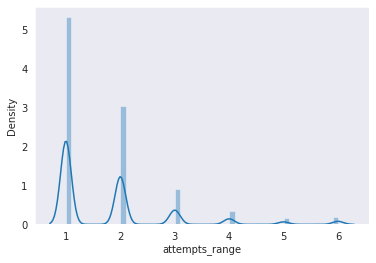

In [168]:
sns.distplot(data_train['attempts_range'])

In [169]:
count=data_train.groupby('submission_count')['attempts_range'].sum().reset_index()
count

,submission_count,attempts_range
0,1,3
1,2,10
2,3,25
3,4,30
4,5,58
...,...,...
931,2609,72
932,2702,94
933,3028,94
934,3075,131


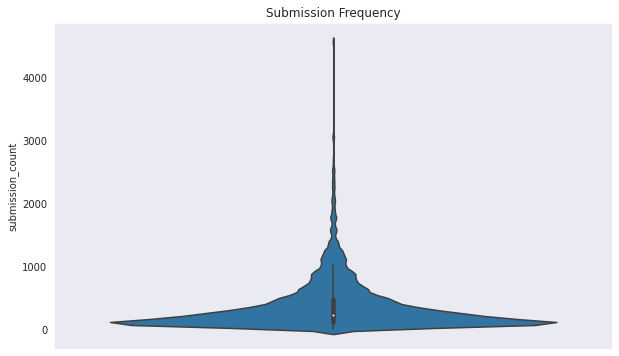

In [170]:
plt.figure(figsize=(10,6))
plt.title("Submission Frequency")
sns.axes_style("dark")
sns.violinplot(y=data_train["submission_count"])
plt.show()

In [171]:
solved=data_train.groupby('problem_solved')['attempts_range'].sum().reset_index()
solved

,problem_solved,attempts_range
0,1,23
1,2,46
2,3,91
3,4,60
4,5,172
...,...,...
897,2482,115
898,2607,94
899,2974,94
900,3006,131


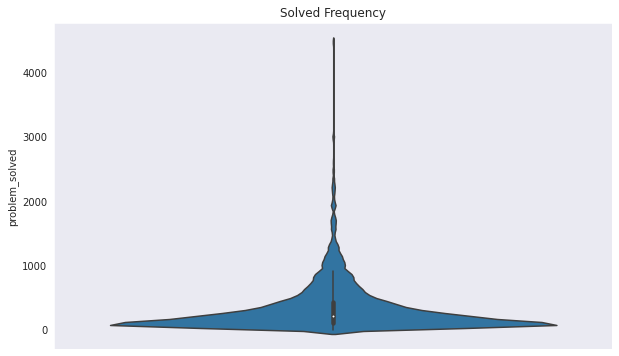

In [172]:
plt.figure(figsize=(10,6))
plt.title("Solved Frequency")
sns.axes_style("dark")
sns.violinplot(y=data_train["problem_solved"])
plt.show()

In [173]:
data_train['percent_solved']= data_train['problem_solved'] / data_train['submission_count']
data_train['percent_solved'] = pd.Series(round(data_train['percent_solved'], 2) * 100)
data_train.percent_solved=data_train.percent_solved.astype(int)

data_test['percent_solved']= data_test['problem_solved'] / data_test['submission_count']
data_test['percent_solved'] = pd.Series(round(data_test['percent_solved'], 2) * 100)
data_train.percent_solved=data_train.percent_solved.astype(int)

data_train.percent_solved

0         89
1         89
2         88
3         86
4         87
          ..
155290    88
155291    89
155292    85
155293    80
155294    87
Name: percent_solved, Length: 155295, dtype: int64

In [174]:
percent=data_train.groupby('percent_solved')['attempts_range'].sum().reset_index()
percent

,percent_solved,attempts_range
0,12,18
1,24,4
2,25,1
3,27,5
4,28,9
...,...,...
65,96,10037
66,97,8142
67,98,6456
68,99,3913


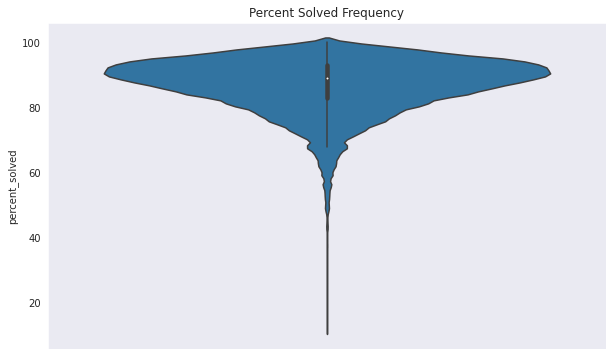

In [175]:
plt.figure(figsize=(10,6))
plt.title("Percent Solved Frequency")
sns.axes_style("dark")
sns.violinplot(y=data_train["percent_solved"])
plt.show()

In [176]:
contribute=data_train.groupby('contribution')['attempts_range'].sum().reset_index()
contribute

,contribution,attempts_range
0,-64,120
1,-44,100
2,-38,69
3,-32,86
4,-28,71
...,...,...
133,137,103
134,139,78
135,152,97
136,157,107


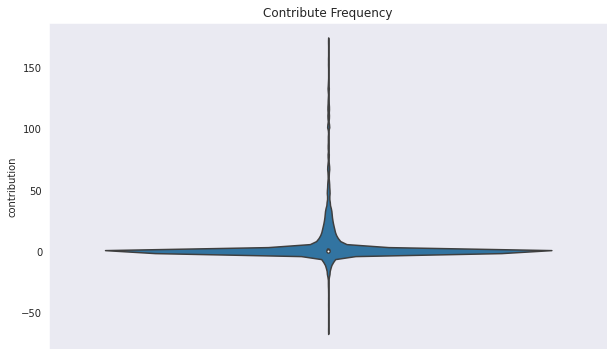

In [177]:
plt.figure(figsize=(10,6))
plt.title("Contribute Frequency")
sns.axes_style("dark")
sns.violinplot(y=data_train["contribution"])
plt.show()

In [178]:
country=data_train.groupby('country')['attempts_range'].sum().reset_index()
country

,country,attempts_range
0,Argentina,918
1,Armenia,311
2,Australia,89
3,Austria,190
4,Azerbaijan,525
...,...,...
74,United Kingdom,275
75,United States,3469
76,Uzbekistan,2328
77,Venezuela,206


In [179]:
#label encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data_train.country=le.fit_transform(data_train.country)
data_test.country=le.fit_transform(data_test.country)

In [180]:
country1=data_train.groupby('country')['attempts_range'].sum().reset_index()
country1

,country,attempts_range
0,0,918
1,1,311
2,2,89
3,3,190
4,4,525
...,...,...
74,74,275
75,75,3469
76,76,2328
77,77,206


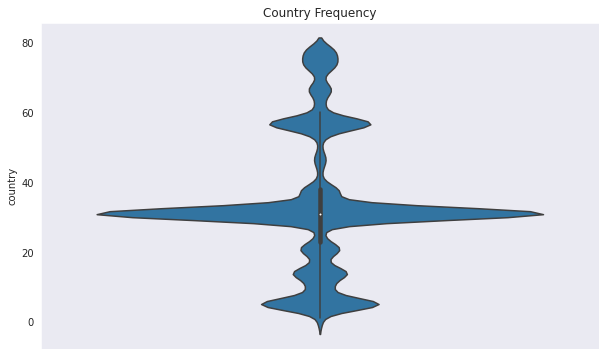

In [181]:
plt.figure(figsize=(10,6))
plt.title("Country Frequency")
sns.axes_style("dark")
sns.violinplot(y=data_train["country"])
plt.show()

In [182]:
follower=data_train.groupby('follower_count')['attempts_range'].sum().reset_index()
follower

,follower_count,attempts_range
0,0,11624
1,1,9671
2,2,10027
3,3,9318
4,4,8351
...,...,...
292,1478,125
293,1855,128
294,2014,78
295,2819,104


In [183]:
data_train['time_online'] = (data_train['last_online_time_seconds'] - data_train['registration_time_seconds'])
data_test['time_online'] = (data_test['last_online_time_seconds'] - data_test['registration_time_seconds'])

data_train.time_online = data_train.time_online.astype(int)
data_test.time_online = data_test.time_online.astype(int)

data_train.time_online

0          71522843
1          47535708
2          31228669
3          57438471
4          67697192
            ...    
155290     35674242
155291     58862502
155292     34568840
155293     36503613
155294    182666151
Name: time_online, Length: 155295, dtype: int64

In [184]:
online=data_train.groupby('time_online')['attempts_range'].sum().reset_index()
online

,time_online,attempts_range
0,6898,3
1,10118,2
2,23205,4
3,217522,1
4,267665,2
...,...,...
3524,240627701,81
3525,240679499,78
3526,240681179,121
3527,240684512,117


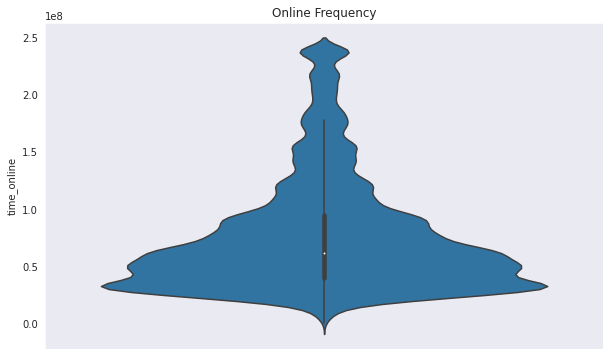

In [185]:
plt.figure(figsize=(10,6))
plt.title("Online Frequency")
sns.axes_style("dark")
sns.violinplot(y=data_train["time_online"])
plt.show()

In [186]:
data_train['rating_diff'] = data_train['max_rating'] - data_train['rating']
data_test['rating_diff'] = data_test['max_rating'] - data_test['rating']

data_train.rating_diff = data_train.rating_diff.astype(int)
data_test.rating_diff = data_test.rating_diff.astype(int)

data_train.rating_diff

0         101
1          88
2         113
3          37
4          20
         ... 
155290     30
155291     40
155292     66
155293     57
155294     13
Name: rating_diff, Length: 155295, dtype: int64

In [187]:
rating=data_train.groupby('rating_diff')['attempts_range'].sum().reset_index()
rating

,rating_diff,attempts_range
0,0,43367
1,1,2092
2,2,2763
3,3,1944
4,4,2972
...,...,...
187,257,78
188,270,77
189,277,106
190,295,87


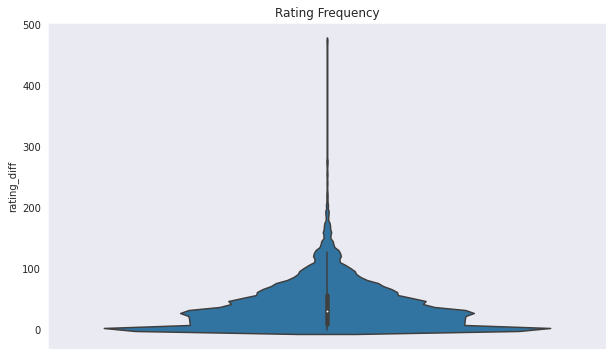

In [188]:
plt.figure(figsize=(10,6))
plt.title("Rating Frequency")
sns.axes_style("dark")
sns.violinplot(y=data_train["rating_diff"])
plt.show()

In [189]:
rank=data_train.groupby('rank')['attempts_range'].sum().reset_index()
rank

,rank,attempts_range
0,advanced,52373
1,beginner,95587
2,expert,8232
3,intermediate,116355


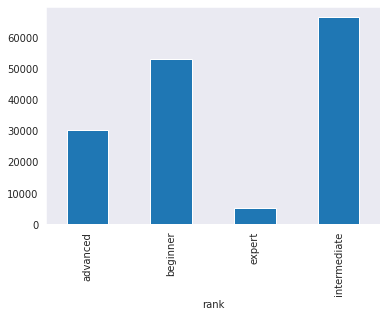

In [190]:
data_train.groupby('rank').attempts_range.count().plot.bar(ylim=0)
plt.show()

In [191]:
data_train['rank']=le.fit_transform(data_train['rank'])
data_test['rank']=le.fit_transform(data_test['rank'])

In [192]:
rank1=data_train.groupby('rank')['attempts_range'].sum().reset_index()
rank1

,rank,attempts_range
0,0,52373
1,1,95587
2,2,8232
3,3,116355


In [193]:
level=data_train.groupby('level_type')['attempts_range'].sum().reset_index()
level

,level_type,attempts_range
0,A,92717
1,B,71248
2,C,50699
3,D,28153
4,E,13408
5,F,4953
6,G,2954
7,H,2164
8,I,1747
9,J,1830


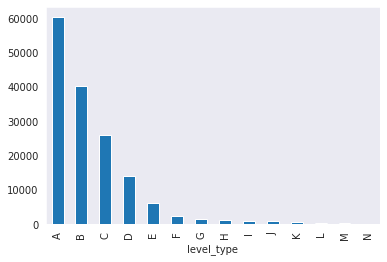

In [194]:
data_train.groupby('level_type').attempts_range.count().plot.bar(ylim=0)
plt.show()

In [195]:
data_train['level_type']=le.fit_transform(data_train['level_type'])
data_test['level_type']=le.fit_transform(data_test['level_type'])

In [196]:
level1=data_train.groupby('level_type')['attempts_range'].sum().reset_index()
level1

,level_type,attempts_range
0,0,92717
1,1,71248
2,2,50699
3,3,28153
4,4,13408
5,5,4953
6,6,2954
7,7,2164
8,8,1747
9,9,1830


In [197]:
points=data_train.groupby('points')['attempts_range'].sum().reset_index()
points

,points,attempts_range
0,-1,3
1,3,237
2,4,81
3,5,5
4,6,6
5,8,19
6,10,1
7,12,2
8,20,4
9,30,47


In [198]:
tags_train = data_train.tags.str.split(",", expand=True)
tags_train.columns = ['tag1', 'tag2', 'tag3', 'tag4', 'tag5', 'tag6', 'tag7']
tags_train

,tag1,tag2,tag3,tag4,tag5,tag6,tag7
0,strings,None,None,None,None,None,None
1,brute force,dp,None,None,None,None,None
2,implementation,None,None,None,None,None,None
3,brute force,implementation,None,None,None,None,None
4,dfs and similar,trees,None,None,None,None,None
...,...,...,...,...,...,...,...
155290,math,None,None,None,None,None,None
155291,data structures,None,None,None,None,None,None
155292,dfs and similar,None,None,None,None,None,None
155293,constructive algorithms,dp,greedy,implementation,None,None,None


In [199]:
tags_test = data_test.tags.str.split(",", expand=True)
tags_test.columns = ['tag1', 'tag2', 'tag3', 'tag4', 'tag5', 'tag6', 'tag7']
tags_test

,tag1,tag2,tag3,tag4,tag5,tag6,tag7
0,implementation,None,None,None,None,None,None
1,brute force,implementation,None,None,None,None,None
2,brute force,implementation,None,None,None,None,None
3,constructive algorithms,dfs and similar,divide and conquer,None,None,None,None
4,binary search,dp,None,None,None,None,None
...,...,...,...,...,...,...,...
66550,brute force,None,None,None,None,None,None
66551,math,None,None,None,None,None,None
66552,dp,None,None,None,None,None,None
66553,implementation,None,None,None,None,None,None


In [200]:
tags_train.isnull().sum().sum(), tags_test.isnull().sum().sum()

(777165, 332877)

In [201]:
tags_train = tags_train.fillna("no tag")
tags_test = tags_test.fillna("no tag")

tags_train

,tag1,tag2,tag3,tag4,tag5,tag6,tag7
0,strings,no tag,no tag,no tag,no tag,no tag,no tag
1,brute force,dp,no tag,no tag,no tag,no tag,no tag
2,implementation,no tag,no tag,no tag,no tag,no tag,no tag
3,brute force,implementation,no tag,no tag,no tag,no tag,no tag
4,dfs and similar,trees,no tag,no tag,no tag,no tag,no tag
...,...,...,...,...,...,...,...
155290,math,no tag,no tag,no tag,no tag,no tag,no tag
155291,data structures,no tag,no tag,no tag,no tag,no tag,no tag
155292,dfs and similar,no tag,no tag,no tag,no tag,no tag,no tag
155293,constructive algorithms,dp,greedy,implementation,no tag,no tag,no tag


In [202]:

tags_train['tag1']=le.fit_transform(tags_train['tag1'])
tags_train['tag2']=le.fit_transform(tags_train['tag2'])
tags_train['tag3']=le.fit_transform(tags_train['tag3'])
tags_train['tag4']=le.fit_transform(tags_train['tag4'])
tags_train['tag5']=le.fit_transform(tags_train['tag5'])
tags_train['tag6']=le.fit_transform(tags_train['tag6'])
tags_train['tag7']=le.fit_transform(tags_train['tag7'])

tags_test['tag1']=le.fit_transform(tags_test['tag1'])
tags_test['tag2']=le.fit_transform(tags_test['tag2'])
tags_test['tag3']=le.fit_transform(tags_test['tag3'])
tags_test['tag4']=le.fit_transform(tags_test['tag4'])
tags_test['tag5']=le.fit_transform(tags_test['tag5'])
tags_test['tag6']=le.fit_transform(tags_test['tag6'])
tags_test['tag7']=le.fit_transform(tags_test['tag7'])

tags_train

,tag1,tag2,tag3,tag4,tag5,tag6,tag7
0,31,22,21,16,7,1,0
1,4,8,21,16,7,1,0
2,22,22,21,16,7,1,0
3,4,19,21,16,7,1,0
4,9,31,21,16,7,1,0
...,...,...,...,...,...,...,...
155290,23,22,21,16,7,1,0
155291,8,22,21,16,7,1,0
155292,9,22,21,16,7,1,0
155293,7,8,15,12,7,1,0


In [203]:
combi_train = data_train.merge(tags_train, left_index=True, right_index=True)
combi_test = data_test.merge(tags_test, left_index=True, right_index=True)

In [204]:
combi_train

,user_id,problem_id,attempts_range,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,level_type,points,tags,ID,percent_solved,time_online,rating_diff,tag1,tag2,tag3,tag4,tag5,tag6,tag7
0,user_232,prob_6507,1,53,47,0,5,1,1503633778,307.913,206.709,1,1432110935,1,1000,strings,user_232_prob_6507,89,71522843,101,31,22,21,16,7,1,0
1,user_3568,prob_2994,3,133,118,0,31,0,1502200122,324.255,235.378,1,1454664414,2,1500,"brute force,dp",user_3568_prob_2994,89,47535708,88,4,8,21,16,7,1,0
2,user_1600,prob_5071,1,50,44,0,31,7,1504719542,343.177,229.358,1,1473490873,0,500,implementation,user_1600_prob_5071,88,31228669,113,22,22,21,16,7,1,0
3,user_2256,prob_703,1,271,233,23,32,40,1505175115,436.927,399.083,3,1447736644,0,500,"brute force,implementation",user_2256_prob_703,86,57438471,37,4,19,21,16,7,1,0
4,user_2321,prob_356,1,155,135,0,31,80,1505421849,492.546,472.190,0,1437724657,3,2000,"dfs and similar,trees",user_2321_prob_356,87,67697192,20,9,31,21,16,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155290,user_2959,prob_2052,1,226,200,0,31,17,1505584042,360.378,329.415,3,1469909800,0,500,math,user_2959_prob_2052,88,35674242,30,23,22,21,16,7,1,0
155291,user_2530,prob_6167,6,583,519,-17,5,70,1505517523,327.122,286.411,1,1446655021,4,2500,data structures,user_2530_prob_6167,89,58862502,40,8,22,21,16,7,1,0
155292,user_445,prob_3110,1,138,117,0,31,13,1504944103,318.807,252.007,1,1470375263,2,1500,dfs and similar,user_445_prob_3110,85,34568840,66,9,22,21,16,7,1,0
155293,user_2337,prob_2685,2,185,148,0,31,1,1486101965,317.661,259.748,1,1449598352,1,1000,"constructive algorithms,dp,greedy,implementation",user_2337_prob_2685,80,36503613,57,7,8,15,12,7,1,0


In [205]:
combi_test

,ID,user_id,problem_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,level_type,points,tags,percent_solved,time_online,rating_diff,tag1,tag2,tag3,tag4,tag5,tag6,tag7
0,user_856_prob_5822,user_856,prob_5822,274,231,0,31,35,1503233908,393.062,362.959,3,1422163139,11,1000,implementation,84.0,81070769,30,22,23,21,16,8,1,0
1,user_2642_prob_2334,user_2642,prob_2334,124,114,0,31,8,1505566590,307.053,146.502,1,1439989756,0,500,"brute force,implementation",92.0,65576834,160,4,19,21,16,8,1,0
2,user_2557_prob_2920,user_2557,prob_2920,367,283,0,5,76,1505585750,321.674,241.399,1,1396166615,0,500,"brute force,implementation",77.0,109419135,80,4,19,21,16,8,1,0
3,user_1572_prob_4598,user_1572,prob_4598,203,181,0,31,29,1503308582,473.050,454.989,3,1421921832,1,1000,"constructive algorithms,dfs and similar,divide...",89.0,81386750,18,7,6,5,16,8,1,0
4,user_295_prob_6139,user_295,prob_6139,113,89,0,59,3,1494541779,455.275,448.108,3,1454257416,0,500,"binary search,dp",79.0,40284363,7,2,8,21,16,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66550,user_1551_prob_2949,user_1551,prob_2949,137,118,0,5,8,1505224785,310.493,234.805,1,1477986503,0,500,brute force,86.0,27238282,75,4,23,21,16,8,1,0
66551,user_2617_prob_6266,user_2617,prob_6266,874,864,1,28,26,1505567477,506.594,451.548,3,1453802063,0,500,math,99.0,51765414,55,23,23,21,16,8,1,0
66552,user_799_prob_1800,user_799,prob_1800,489,455,2,55,26,1505562856,565.654,552.466,0,1450107416,4,1000,dp,93.0,55455440,13,11,23,21,16,8,1,0
66553,user_1265_prob_137,user_1265,prob_137,59,50,0,31,5,1500891253,317.947,263.475,1,1465900834,1,1000,implementation,85.0,34990419,54,22,23,21,16,8,1,0


Feature Selection

In [206]:
features = ['country', 'follower_count', 'rank', 'level_type', 'points', 'percent_solved',
            'time_online', 'rating_diff', 'tag1', 'tag2', 'tag3', 'tag4', 'tag5', 'tag6', 'tag7']

Define X, y, and X_test

In [207]:
y = train.attempts_range
X = combi_train[features]
X_test = combi_test[features]

In [208]:
y

0         1
1         3
2         1
3         1
4         1
         ..
155290    1
155291    6
155292    1
155293    2
155294    2
Name: attempts_range, Length: 155295, dtype: int64

In [209]:
X

,country,follower_count,rank,level_type,points,percent_solved,time_online,rating_diff,tag1,tag2,tag3,tag4,tag5,tag6,tag7
0,5,1,1,1,1000,89,71522843,101,31,22,21,16,7,1,0
1,31,0,1,2,1500,89,47535708,88,4,8,21,16,7,1,0
2,31,7,1,0,500,88,31228669,113,22,22,21,16,7,1,0
3,32,40,3,0,500,86,57438471,37,4,19,21,16,7,1,0
4,31,80,0,3,2000,87,67697192,20,9,31,21,16,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155290,31,17,3,0,500,88,35674242,30,23,22,21,16,7,1,0
155291,5,70,1,4,2500,89,58862502,40,8,22,21,16,7,1,0
155292,31,13,1,2,1500,85,34568840,66,9,22,21,16,7,1,0
155293,31,1,1,1,1000,80,36503613,57,7,8,15,12,7,1,0


In [210]:
X_test

,country,follower_count,rank,level_type,points,percent_solved,time_online,rating_diff,tag1,tag2,tag3,tag4,tag5,tag6,tag7
0,31,35,3,11,1000,84.0,81070769,30,22,23,21,16,8,1,0
1,31,8,1,0,500,92.0,65576834,160,4,19,21,16,8,1,0
2,5,76,1,0,500,77.0,109419135,80,4,19,21,16,8,1,0
3,31,29,3,1,1000,89.0,81386750,18,7,6,5,16,8,1,0
4,59,3,3,0,500,79.0,40284363,7,2,8,21,16,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66550,5,8,1,0,500,86.0,27238282,75,4,23,21,16,8,1,0
66551,28,26,3,0,500,99.0,51765414,55,23,23,21,16,8,1,0
66552,55,26,0,4,1000,93.0,55455440,13,11,23,21,16,8,1,0
66553,31,5,1,1,1000,85.0,34990419,54,22,23,21,16,8,1,0


SMOTE

In [211]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Split dataset into training and testing

In [212]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=1)

In [213]:
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((447141, 15), (49683, 15), (447141,), (49683,))

Standard Scaler

In [214]:
#standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

#X_train=sc.fit_transform(X_train)
#X_val=sc.fit_transform(X_val)
#X_test=sc.fit_transform(X_test)

Model selection

In [215]:
#mlp classifier
from sklearn.neural_network import MLPClassifier

#model = MLPClassifier(random_state=1, max_iter=500, early_stopping=True).fit(X_train, Y_train)
#model.predict_proba(X_val)

In [217]:
#hist gradient boosting classifier
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier().fit(X_train, Y_train)
print(model.score(X_train, Y_train))

0.5019758868008078


In [218]:
 y_pred = model.predict(X_val)
 print(model.score(X_val, Y_val))

0.4870478835819093


In [219]:
# f1 score and recall score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

f1_score(Y_val, y_pred, average='weighted'), recall_score(Y_val, y_pred, average='weighted')

(0.47311254216640775, 0.4870478835819093)

In [220]:
#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = model.get_params()
print(params)

{'l2_regularization': 0.0, 'learning_rate': 0.1, 'loss': 'auto', 'max_bins': 255, 'max_depth': None, 'max_iter': 100, 'max_leaf_nodes': 31, 'min_samples_leaf': 20, 'n_iter_no_change': None, 'random_state': None, 'scoring': None, 'tol': 1e-07, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [221]:
#Create a confusion matrix
#y_test as first argument and the preds as second argument 
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_val, y_pred)

array([[6670, 1258,  103,   30,   39,   71],
       [3944, 2715,  879,  313,  171,  373],
       [1390, 1483, 2910,  763,  821,  890],
       [ 672,  860, 1014, 2631, 1717, 1458],
       [ 371,  555,  755,  637, 4667, 1315],
       [ 386,  466,  591,  609, 1551, 4605]])

In [222]:
#Accuracy statistics
from sklearn import metrics

print('Accuracy Score:', metrics.accuracy_score(Y_val, y_pred))  

Accuracy Score: 0.4870478835819093


In [223]:
#Create classification report
from sklearn.metrics import classification_report

class_report=classification_report(Y_val, y_pred)
print(class_report)

              precision    recall  f1-score   support

           1       0.50      0.82      0.62      8171
           2       0.37      0.32      0.35      8395
           3       0.47      0.35      0.40      8257
           4       0.53      0.32      0.39      8352
           5       0.52      0.56      0.54      8300
           6       0.53      0.56      0.54      8208

    accuracy                           0.49     49683
   macro avg       0.48      0.49      0.47     49683
weighted avg       0.48      0.49      0.47     49683



In [224]:
df=pd.DataFrame({'Actual': Y_val, 'Predicted':y_pred})
df

,Actual,Predicted
0,4,6
1,1,1
2,1,1
3,5,5
4,6,6
...,...,...
49678,6,6
49679,2,5
49680,2,3
49681,6,6


In [225]:
#accuracy
accuracy = round(model.score(X_val, Y_val) * 100,2)
print(accuracy)

48.7


In [226]:
test_pred=model.predict(X_test)
test_pred

array([2, 1, 1, ..., 6, 2, 2])

In [228]:
output = pd.DataFrame({'ID': test.ID, 'attempts_range': test_pred})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")
output

Your submission was successfully saved!


,ID,attempts_range
0,user_856_prob_5822,2
1,user_2642_prob_2334,1
2,user_2557_prob_2920,1
3,user_1572_prob_4598,2
4,user_295_prob_6139,2
...,...,...
66550,user_1551_prob_2949,2
66551,user_2617_prob_6266,1
66552,user_799_prob_1800,6
66553,user_1265_prob_137,2
